In [39]:
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib notebook

# Ларичева Мария БПМ-161
## Лабораторная работа 6. Вариант 12

### **Задача 6.1**

Вычислить значение интеграла $\int_{1}^{1.44} P_n(x)dx$, где $P_n(x) = \sum_{i=0}^{n}c_ix^i$ с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл с точностью до 0.0001. Предварительно оценить шаг интегрирования, при котором достигается заданная точность. 

Зададим функцию $P_n(x)$:

In [100]:
def Pn(x):
    return (5.3 - 1.2*x - 1.5*x**2 + 1.3*x**3 - 7.1*x**4)

Вычислим значение интеграла аналитически

In [104]:
import scipy.integrate as integrate
ans, err = integrate.quad(Pn, 1, 1.44)
print(ans)
print(err)

-5.604977207807997
6.222774748607659e-14


Вычислим методом трапеций и посчитаем отн погрешность

In [105]:
def trapec(Pn, x1, x2, n):
    h = abs(x1-x2)/n
    x = []
    for i in range(n+1):
        x.append(x1+i*h)
    f = []
    for j in range(1,n):
        f.append(2*Pn(x[j]))
    return h/2*(Pn(x1)+sum(f) + Pn(x2))

In [106]:
ans1 = trapec(Pn, 1, 1.44, 100)
err1 = ans-ans1
print(ans1)
print(err1)

-5.605063577416671
8.636960867391963e-05


Вычислим методом Симпсона  и посчитаем отн погрешность

In [27]:
def Simpson(Pn, x1, x2, n):
    h = abs(x1-x2)/(2*n)
    x = []
    for i in range(2*n+1):
        x.append(x1+i*h)
    f = []
    for j in range(1,n+1):
        f.append(4*Pn(x[2*j-1]))
        if not (j == n):
            f.append(2*Pn(x[2*j]))
    return h/3*(Pn(x1)+sum(f)+Pn(x2))

In [30]:
ans2 = Simpson(Pn, 1, 1.44, 100)
err2 = ans-ans2
print(ans2)
print(err2)

-5.604977207817757
9.759304475664976e-12


Используя выражение для остаточных членов интегрирования, оценим шаги, при которых величина погрешности каждой квадратурной формы будет меньше 0.0001

Остаточный член для метода трапеций задается формулой: $R = \frac{M_2(b-a)h^2}{12}$, где $M_2$ -  макс значение второй  производной многочлена. 

In [69]:
def M2(x):
    return (-3 + 1.3*6*x - 7.1*12*x**2)

Наложим ограничения на шаг $h^2 < \frac{0.0001*12}{M_2*(b-a)}$, то есть $h < \sqrt{\frac{0.0001*12}{M_2*(b-a)}}$ (так как h>0 по определению)

In [118]:
from scipy import optimize
h1 = math.sqrt(0.0001*12/(abs(M2(optimize.fminbound(lambda x: -M2(x), 1, 1.44))))*(1.44-1))
print(h1)

0.002562638767127989


In [119]:
n1 = 0.44/h1
print(n1)

171.69801910595405


In [129]:
ans11 = trapec(Pn, 1, 1.44, 172)
err11 = ans-ans11
print(ans11)
print(err11)

-5.605006402519501
2.91947115034219e-05


Остаточный член для метода Симпсона задается формулой: $R = \frac{M_4(b-a)h^4}{2880}$, где $M_4$ -  макс значение четвертой производной многочлена. 

In [125]:
M4 = 7.1*12*2
h2 = math.sqrt(math.sqrt(0.0001*2880/M4*(1.44-1)))
print(h2)

0.16513681095693805


In [126]:
n2 = 0.44/h2
print(n2)

2.6644574123133378


In [128]:
ans22 = Simpson(Pn, 1, 1.44, 3)
err22 = ans-ans22
print(ans22)
print(err22)

-5.604989254157693
1.2046349695538083e-05


### **Задача 6.4**

Построить график функции $ F(x) = \int_{a}^{b} f(x,t)dt, x_1\leq{x}\leq{x_2}$.  Для вычисления интеграла с точностью $10^{-8}$ использовать квадратурную формулу Симпсона и правило Рунге оценки погрешности

Зададим функцию и параметры

In [137]:
def ft(x):
    def f(t):
        return (t* math.sin(x*t**2))
    return f

In [138]:
a = -2
b = 0
x1 = 0
x2 = 3

Вычислим интеграл по формуле Симпсона для какого-то фиксированного значения $x$ (например, на середине отрезка), возьмем в качестве начального числа шагов $n = 10$:

In [149]:
n = 10
I_n = Simpson(ft((x1+x2)/2), a,b,n)

По формуле Рунге оценим погрешность как $\Delta_{2n} = \frac{1}{15}|I_{2n} - I_n|$

In [154]:
I_2n = Simpson(ft((x1+x2)/2), a,b,2*n)
delta = (1/15)*abs(I_2n-I_n)
print(delta<10e-8)

False


In [155]:
I_4n = Simpson(ft((x1+x2)/2), a,b,4*n)
delta = (1/15)*abs(I_4n-I_2n)
print(delta<10e-8)

False


In [156]:
I_8n = Simpson(ft((x1+x2)/2), a,b,8*n)
delta = (1/15)*abs(I_8n-I_4n)
print(delta<10e-8)

True


Получили, что для $n_0 = 4n$ выполняется условие Рунге, поэтому в дальнейшем будем брать число шагов, равное 40

In [159]:
n0 = 40
x = np.linspace(x1, x2, num=100)
y = [Simpson(ft(i),a,b,n0) for i in x]

[Text(0, 0.5, 'F(x)'), Text(0.5, 0, 'x')]

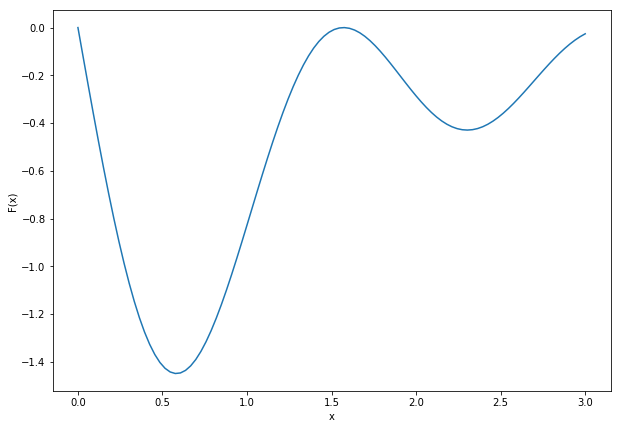

In [174]:
fig1,ax1 = plt.subplots(figsize = (10,7))
plt1 = ax1.plot(x,y)
ax1.set(xlabel='x', ylabel='F(x)',)

### **Задача 6.8**

Используя квадратурную формулу Симпсона, вычислить двойной интеграл $\int_{a}^{b}\int_{c}^{d}f(x,y)dxdy $ от функции двух переменных $f(x,y)$ по прямоугольной области $D = \{(x,y), x\in{[a,b]}, y\in{[c,d]}\}$ с точностью 0.001.

Зададим переменные и саму функцию

In [177]:
a,b = 0,1.5
c,d = 0,3

In [181]:
def fx(y):
    def f(x):
        return (x* math.sin(x*y**2))
    return f

До этого мы уже подсчитали, что для точности 0.001 достаточно $n = 3$ шагов. Обозначим внутреннюю функцию за $F(y)$

In [196]:
def F(y):
    z = fx(y)
    x1 = c
    x2 = d
    def Simpson(z, x1, x2, n=3):
        h = abs(x1-x2)/(2*n)
        x = []
        for i in range(2*n+1):
            x.append(x1+i*h)
        f = []
        for j in range(1,n+1):
            f.append(4*z(x[2*j-1]))
            if not (j == n):
                f.append(2*z(x[2*j]))
        return h/3*(z(x1)+sum(f)+z(x2))
    return Simpson(fx(y), c, d, n=3)

Затем посчитаем внешний интеграл, в качестве внутренней функции взяв $F(y)$

In [197]:
I = Simpson(F, a, b, n=3)
print(I)

2.100378259855151


### **Задача 6.6**

Вычислить значение интеграла из задачи 6.1, используя квадратурную формулу Гаусса с одним, двумя, тремя, четырьмя узлами. Определить абсолютную погрешность результата. Построить гистограмму зависимости погрешности от числа узлов. Убедиться, что квадратурные формулы Гаусса с N+1 (N = 0,1,2,3) узлов точны для многочленов $1,t,...,t^m$, где m = 2N+1

In [254]:
def Gauss(Pn,a,b,t,A,N):
    l = []
    for i in range(0,N+1):
        l.append(A[i]*Pn((a+b)/2+(b-a)*t[i]/2))
    return (b-a)/2*sum(l)

Зададим значения узлов и весов квадратурной формулы Гаусса

In [199]:
t_list = [[0], [-0.577350269189626, 0.577350269189626], 
          [-0.77459666929954,0,0.77459666929954], 
          [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]

In [201]:
A_list = [[2], [1,1], [0.55555555555556, 0.88888888888888, 0.55555555555556],
         [0.347854845137454,0.652145154862546,0.652145154862546,0.347854845137454]]

In [255]:
errors = []
for j in range(len(t_list)):
    I = Gauss(Pn,1,1.44,t_list[j], A_list[j],j)
    er = ans - I
    errors.append(er)
print(errors)

[6.86785620165266, 7.295638797137104, 7.296289300085107, 7.29628930002066]


Построим гистограмму

<BarContainer object of 4 artists>

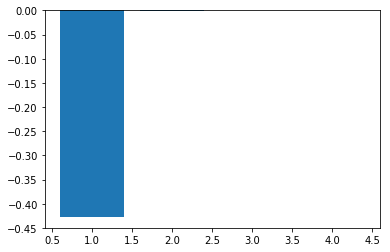

In [242]:
plt.bar([1,2,3,4],[-0.42843309836800003, -0.0006505028835555038, 6.444711431186079e-11, 0.0])

Убедимся, что эти квадратурные формулы верны для многочленой типа $1, t, ..., t^m$

In [246]:
N_list = [0,1,2,3]
m_list = []
for i in N_list:
    l = []
    for j in range(2*i+1):
        l.append(j)
    m_list.append(l)
print(m_list)

[[0], [0, 1, 2], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6]]


In [247]:
def polm(m):
    def pol(t):
        return t**m
    return pol

In [257]:
for i in range(len(N_list)):
    for j in m_list[i]:
        ans, err = integrate.quad(polm(m_list[i][j]), 1, 1.44)
        an = Gauss(polm(m_list[i][j]),1,1.44,t_list[i], A_list[i],i)
        print(an-ans)

0.0
0.0
0.0
0.0
0.0
0.0
1.0641487691032125e-12
3.894773392687512e-12
9.565015446355574e-12
0.0
0.0
0.0
-1.1102230246251565e-16
0.0
0.0
0.0


Везде или ноль, или почти ноль (может влиять погрешность интеграла, выч аналитичеки), поэтому формулы верны

### **Задача 6.9**

Для интегрального уравнения $y(x) - \lambda\int_{a}^{b}k(x,t)y(t)dt = f(x)$ составить таблицу значений решения с тремя верными значащими цифрами с постоянным шагом $h = \frac{b-a}{10}$, используя формулу левых прямоугольников. Построить график решения.

Задаим функции

In [277]:
def k(x,t):
    return math.tan(x/(1+t))

In [284]:
def func(x):
    return (math.log(1+x))

In [272]:
lbd = -0.1
a = 0
b = 1
n = 10

Заменим интегральное выражение на сумму, используя квадратурную формулу. Получим систему линейных уравнений, будем брать разные значения х и в них решать ее

In [288]:
x = np.linspace(a,b,n)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [289]:
f = [func(i) for i in x]
A = np.zeros((len(x),len(x)))
for j in range(n):
    for i in range(n):
        A[j,i] = k(t[j],t[i])*(-lbd)*(b-a)/10
        if j == i:
            A[j,i] +=1
A[:,0] *= 0.5
A[:,-1] *= 0.5
y = np.linalg.solve(A,f)

In [290]:
print(y)

[0.         0.10285221 0.19562875 0.28005464 0.357431   0.42875867
 0.4948179  0.55622074 0.61344487 1.33370709]


Сделаем из этого всего таблицу

In [293]:
import pandas as pd
x = np.around(x, decimals=3)
y = np.around(y, decimals=3)
df = pd.DataFrame({'x': x, 'y': y})
print(df)

       x      y
0  0.000  0.000
1  0.111  0.103
2  0.222  0.196
3  0.333  0.280
4  0.444  0.357
5  0.556  0.429
6  0.667  0.495
7  0.778  0.556
8  0.889  0.613
9  1.000  1.334


Построим график по табличке

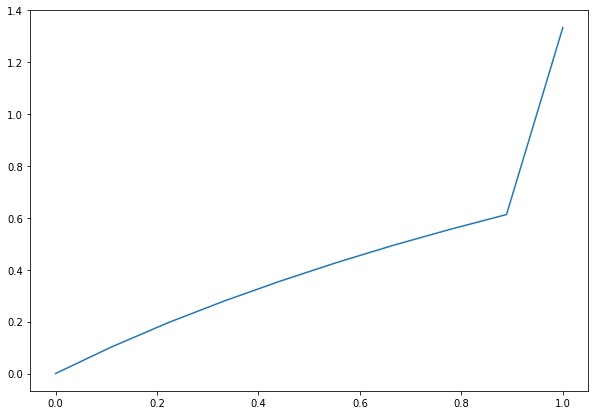

In [294]:
fig3,ax3 = plt.subplots(figsize = (10,7))
plt3 = ax3.plot(x,y)